In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('dataset/train.csv')
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test = pd.read_csv('dataset/test.csv')
print('Testing data shape: ', test.shape)
test.head()

Testing data shape:  (3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [6]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'sample')

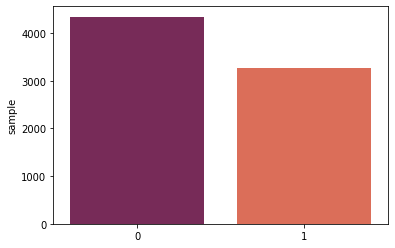

In [7]:
# sns.barplot(y=,x=,)
sns.barplot(train['target'].value_counts().index, train['target'].value_counts(),palette='rocket')
plt.gca().set_ylabel('sample')

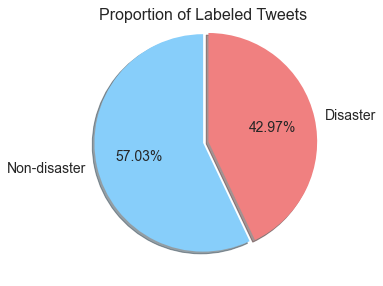

In [8]:
# set the figure size
plt.figure(figsize=(9, 5))

# set the style
plt.style.use('seaborn-darkgrid')

# set the colors
colors = ['lightskyblue', 'lightcoral']

# generate a pie plot
plt.pie(train['target'].value_counts(), explode=(0, 0.05), labels=["Non-disaster", "Disaster"], 
        autopct="%0.2f%%", textprops={'fontsize': 14}, shadow=True, startangle=90, colors=colors)

# add a title
plt.title('Proportion of Labeled Tweets', size=16, y=0.93)

# show the plot
plt.show()

In [9]:
# set the random state
random_state = 4041

# import the wordcloud library
from wordcloud import WordCloud

# concat all the text for each labels
non_disaster_text = [''.join(t) for t in train[train['target']==0]['text']]
non_disaster_strings = ' '.join(map(str, non_disaster_text))
disaster_text = [''.join(t) for t in train[train['target']==1]['text']]
disaster_strings = ' '.join(map(str, disaster_text))

# generate word clouds
non_disaster_cloud = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(non_disaster_strings)
disaster_cloud = WordCloud(width=800, height=400, max_words=500, random_state=random_state).generate(disaster_strings)

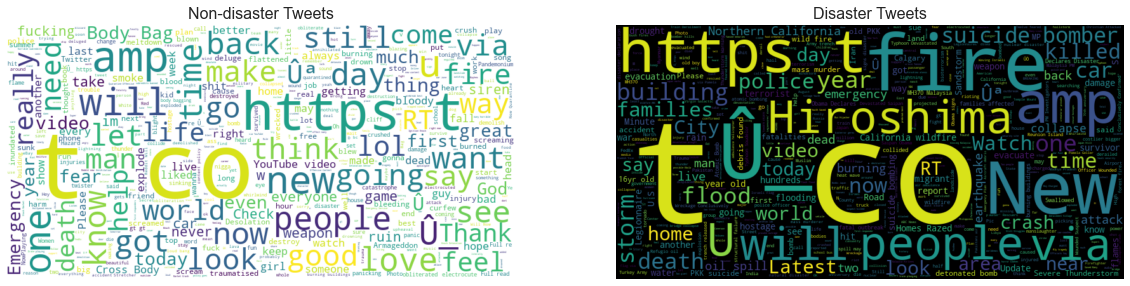

In [10]:
# create subplots for the generated clouds
fig, axes = plt.subplots(1, 2, figsize = (20,20))
axes[0].imshow(non_disaster_cloud, interpolation='bilinear')
axes[1].imshow(disaster_cloud, interpolation='bilinear')

# turn the axis off
[ax.axis('off') for ax in axes]

# add titles
axes[0].set_title('Non-disaster Tweets', fontsize=16)
axes[1].set_title('Disaster Tweets', fontsize=16)

# show the figure
plt.show()

In [11]:
disaster_tweets = train[train['target']==1]['text']
disaster_tweets.values[1]

'Forest fire near La Ronge Sask. Canada'

In [12]:
non_disaster_tweets = train[train['target']==0]['text']
non_disaster_tweets.values[1]

'I love fruits'

In [13]:
train['keyword'].value_counts()[:20]

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
Name: keyword, dtype: int64

<AxesSubplot:xlabel='keyword'>

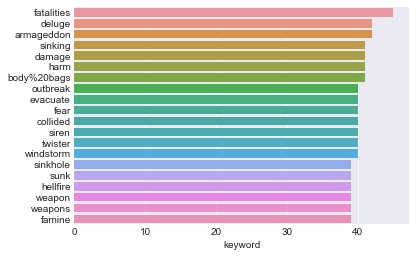

In [14]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],
            orient='h')

In [15]:
train.loc[train['text'].str.contains('disaster', na=False, case=False)].target.value_counts()

1    102
0     40
Name: target, dtype: int64

In [16]:
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

<AxesSubplot:xlabel='location'>

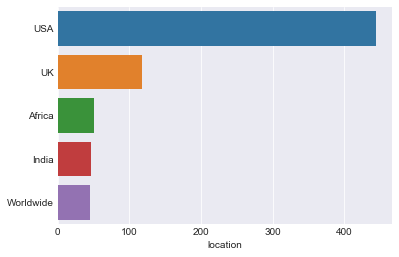

In [17]:
sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5],
            orient='h')

In [18]:
import os
import re
import time
import string

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = set(stopwords.words('english'))
import re, string
import spacy

In [21]:
# create a new feature for the number of sentences in each Tweet
train['sent_count'] = train['text'].apply(nltk.tokenize.sent_tokenize).apply(len)
test['sent_count'] = test['text'].apply(nltk.tokenize.sent_tokenize).apply(len)

In [22]:
# create a new feature for the number of words
train['word_count'] = train['text'].apply(nltk.tokenize.word_tokenize).apply(len)
test['word_count'] = test['text'].apply(nltk.tokenize.word_tokenize).apply(len)

In [23]:
# create a new feature for the number of characters excluding white spaces
train['char_count'] = train['text'].apply(lambda x: len(x) - x.count(" "))
test['char_count'] = test['text'].apply(lambda x: len(x) - x.count(" "))

In [24]:
# define a function that returns the number of hashtags in a string
def hash_count(string):
    words = string.split()
    hashtags = [w for w in words if w.startswith('#')]
    return len(hashtags)

# create a new feature for the number of hashtags
train['hash_count'] = train['text'].apply(hash_count)
test['hash_count'] = test['text'].apply(hash_count)

In [25]:
# define a function that returns the number of mentions in a string
def ment_count(string):
    words = string.split()
    mentions = [w for w in words if w.startswith('@')]
    return len(mentions)

# create a new feature for the number of mentions
train['ment_count'] = train['text'].apply(ment_count)
test['ment_count'] = test['text'].apply(ment_count)

In [26]:
# define a function that returns the number of words in all CAPS
def all_caps_count(string):
    words = string.split()
    pattern = re.compile(r'\b[A-Z]+[A-Z]+\b')
    capsWords = [w for w in words if w in re.findall(pattern, string)]
    return len(capsWords)

# create a new feature for the number of words in all CAPS
train['all_caps_count'] = train['text'].apply(all_caps_count)
test['all_caps_count'] = test['text'].apply(all_caps_count)

In [27]:
# define a function that returns the average length of words
def avg_word_len(string):
    words = string.split()
    total_len = sum([len(words[i]) for i in range(len(words))])
    avg_len = round(total_len / len(words), 2)
    return avg_len

# create a new feature for the average length of words
train['avg_word_len'] = train['text'].apply(avg_word_len)
test['avg_word_len'] = test['text'].apply(avg_word_len)

In [28]:
# define a function using nltk that returns the number of proper nouns in the text
def propn_count_nltk(text):    
    tokens = nltk.word_tokenize(text)
    tagged = [token for token in nltk.pos_tag(tokens)]
    propn_count = len([token for (token, tag) in tagged if tag == 'NNP' or tag == 'NNPS'])
    return propn_count

# create a new feature for the number of proper nouns
train['propn_count_nltk'] = train['text'].apply(propn_count_nltk)
test['propn_count_nltk'] = test['text'].apply(propn_count_nltk)

In [29]:
# load the model
nlp = spacy.load('en_core_web_sm')

In [30]:
# # define a function that returns number of proper nouns with spaCy
def propn_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for numbers of proper nouns
train['propn_count'] = train['text'].apply(propn_count)
test['propn_count'] = test['text'].apply(propn_count)

KeyboardInterrupt: 

In [ ]:
# remove 'propn_count_nltk' columns
train = train.drop(['propn_count_nltk'], axis=1)
test = test.drop(['propn_count_nltk'], axis=1)

In [ ]:
# define a function that returns number of non-proper nouns
def noun_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('NOUN')
# 
# create a new feature for numbers of non-proper nouns
train['noun_count'] = train['text'].apply(noun_count)
test['noun_count'] = test['text'].apply(noun_count)

In [ ]:
# define a function that returns the percentage of punctuation
def punc_per(text):
    total_count = len(text) - text.count(" ")
    punc_count = sum([1 for c in text if c in string.punctuation])
    if punc_count != 0 and total_count != 0:
        return round(punc_count / total_count * 100, 2)
    else:
        return 0

# create a new feature for the percentage of punctuation in text
train['punc_per'] = train['text'].apply(punc_per)
test['punc_per'] = test['text'].apply(punc_per)

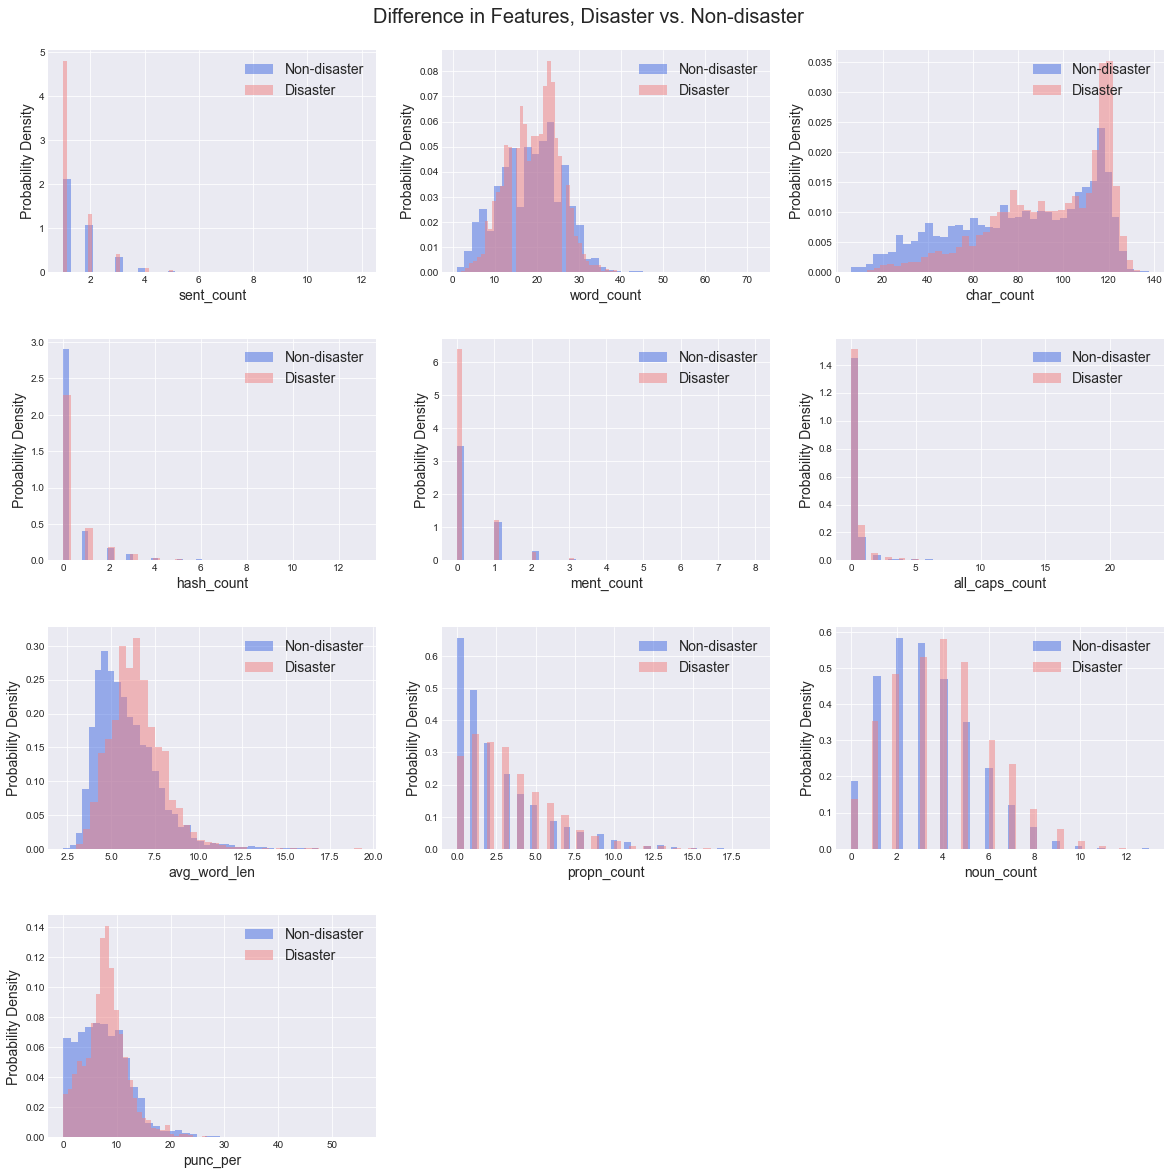

In [ ]:
# store the features and their names in variables
features = ['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count', 'all_caps_count', 
            'avg_word_len', 'propn_count', 'noun_count', 'punc_per']

# create the figure
fig = plt.figure(figsize=(20, 20))

# adjust the height of the padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.3)

# add a centered suptitle to the figure
plt.suptitle("Difference in Features, Disaster vs. Non-disaster", fontsize=20, y=0.91)

# generate the histograms in a for loop
for i, feature in enumerate(features):
    
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, i+1)
    ax = train[train['target']==0][feature].hist(alpha=0.5, label='Non-disaster', bins=40, color='royalblue', density=True)
    ax = train[train['target']==1][feature].hist(alpha=0.5, label='Disaster', bins=40, color='lightcoral', density=True)
    
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
    

# shot the figure
plt.show()

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

In [32]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv1D, MaxPooling1D, SimpleRNN, GRU, LSTM, Bidirectional
from keras.layers import Embedding, BatchNormalization, Dense, TimeDistributed, Dropout, Flatten, GlobalMaxPool1D
import visualkeras

In [33]:
train = pd.read_csv('dataset/train.csv')
test  = pd.read_csv('dataset/test.csv')
submission = pd.read_csv('dataset/sample_submission.csv')

In [34]:
train_sent, test_sent, train_label = train.text.values, test.text.values, train.target.values

In [35]:
train.text.values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [36]:
from sklearn.metrics import classification_report
leak = pd.read_csv("dataset/socialmedia-disaster-tweets-DFE.csv", encoding='latin_1')
leak['target'] = (leak['choose_one']=='Relevant').astype(int)
leak['id'] = leak.index
leak = leak[['id', 'target','text']]
merged_df = pd.merge(test, leak, on='id')
gt_df = merged_df[['id', 'target']]
#gt_df.to_csv('submit.csv', index=False)

In [37]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_sent)
vocab_length = len(word_tokenizer.word_index) + 1

In [38]:
def embed(corpus): return word_tokenizer.texts_to_sequences(corpus)

In [39]:
def metrics(y_true, y_pred):
    print("F1-score: ", round(f1_score(y_true, y_pred), 2))
    print("Precision: ", round(precision_score(y_true, y_pred), 2))
    print("Recall: ", round(recall_score(y_true, y_pred), 2))
    
def plot(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

In [40]:
longest_train = max(train_sent, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train)) # max_len = 31

In [41]:
padded_sentences = pad_sequences(embed(train_sent), length_long_sentence, padding='post')
test_sentences   = pad_sequences(embed(test_sent), length_long_sentence, padding='post')

In [42]:
%%time
# Import word vectors from GloVe
embeddings_dictionary = dict()
embedding_dim = 100
glove_file = open('dataset/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector # embedding_matrix.shape = (16834, 100)

CPU times: total: 21.7 s
Wall time: 23.1 s


In [43]:
X_train, X_test, y_train, y_test = train_test_split(padded_sentences, 
                                                    train_label, 
                                                    test_size=0.25,
                                                    random_state=42, 
                                                    shuffle=True)
# X_train.shape, X_test.shape = ((5709, 31), (1904, 31))

In [53]:
def training(model, model_name):
    # Config
    checkpoint = ModelCheckpoint("models/"+model_name + '.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
    reduce_lr  = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, verbose = 1, patience = 5, min_lr = 0.001)
    early_stop = EarlyStopping(monitor='val_loss', patience=1)
    
    # Train
    start_time = time.time()
    history = model.fit(X_train, y_train, 
                        epochs = 100,
                        batch_size = 32,
                        validation_data = [X_test, y_test],
                        verbose = 1,
                        callbacks = [reduce_lr, checkpoint, early_stop])
    end_time = time.time()
    print("\n=>Training time :", round(end_time - start_time, 1), 's')

    # Validation
    model.load_weights("models/"+model_name + '.h5')
    start_time = time.time()
    preds =  (model.predict(X_test) > 0.5).astype("int32")
    end_time = time.time()
    print('\n=>Average Inference Time :', round((end_time - start_time) / len(X_test) * 1000, 1), 'ms')
    print('\n=>Model Size :', round(os.stat("models/"+model_name + '.h5').st_size / (1024 ** 2), 1), 'MB')
    
    # Evaluation
    print('='*5, 'train_test_split Evaluation:', '='*5)
    metrics(y_test, preds)
    plot(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])
    
    # Ground Truth evaluation
    print('='*5, 'Ground Truth Evaluation:', '='*5)
    test_preds = (model.predict(test_sentences) > 0.5).astype("int32")
    metrics(gt_df['target'], test_preds)
    print('sklearn f1_score average=micro:', f1_score(gt_df['target'], test_preds, average='micro'))
    print('classification_report accuracy:', classification_report(gt_df['target'], test_preds, output_dict=True)['accuracy'])
    print(classification_report(gt_df['target'], test_preds))

In [54]:
def CNN():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [55]:
model = CNN()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 72, 100)           2270100   
                                                                 
 conv1d_1 (Conv1D)           (None, 65, 32)            25632     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                10250     
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                      

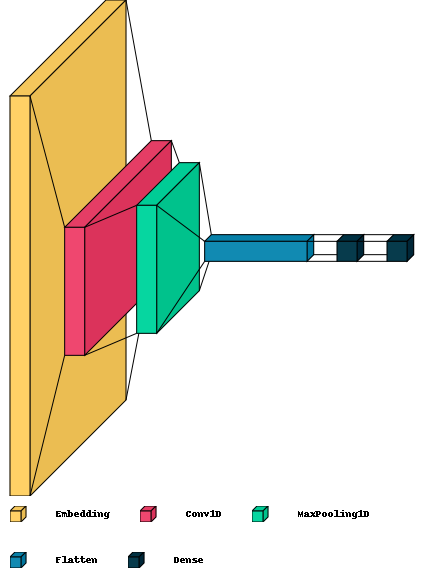

In [56]:
visualkeras.layered_view(model,legend=True, draw_volume=True, spacing=30)

Epoch 1/100
179/179 [==============================] - 15s 66ms/step - loss: 0.5294 - accuracy: 0.7413 - val_loss: 0.4326 - val_accuracy: 0.8120
Epoch 2/100
179/179 [==============================] - 11s 60ms/step - loss: 0.3650 - accuracy: 0.8408 - val_loss: 0.4135 - val_accuracy: 0.8283
Epoch 3/100
179/179 [==============================] - 8s 47ms/step - loss: 0.2557 - accuracy: 0.9009 - val_loss: 0.4430 - val_accuracy: 0.8136
Epoch 4/100
179/179 [==============================] - 8s 47ms/step - loss: 0.1545 - accuracy: 0.9443 - val_loss: 0.5331 - val_accuracy: 0.7894
Epoch 5/100
179/179 [==============================] - 9s 48ms/step - loss: 0.0931 - accuracy: 0.9714 - val_loss: 0.7122 - val_accuracy: 0.7605
Epoch 6/100
179/179 [==============================] - 9s 48ms/step - loss: 0.0642 - accuracy: 0.9793 - val_loss: 0.5929 - val_accuracy: 0.7962
Epoch 7/100
179/179 [==============================] - 8s 47ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.6776 - val_accurac

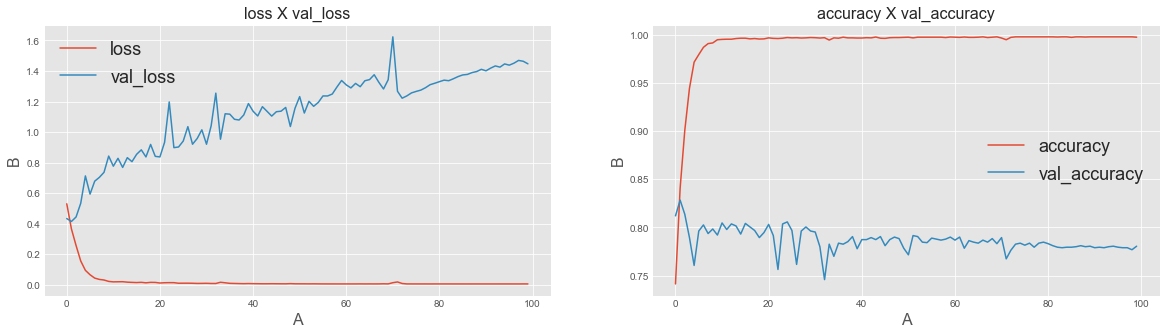

In [57]:
training(model, 'model_cnn')

In [58]:
def RNN():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(SimpleRNN(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [59]:
model = RNN()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 72, 100)           2270100   
                                                                 
 bidirectional_1 (Bidirectio  (None, 72, 144)          24912     
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 144)              0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_1 (Batc  (None, 144)              576       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 144)               0         
                                                      

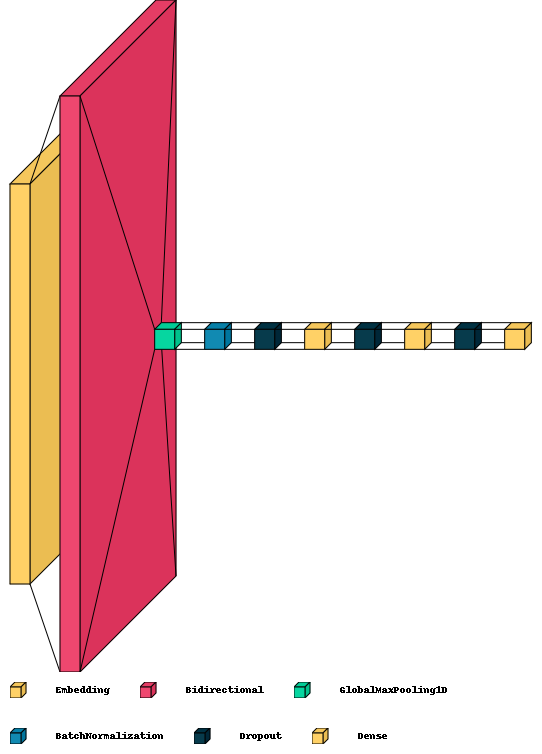

In [60]:
visualkeras.layered_view(model,legend=True, draw_volume=True, spacing=30)

Epoch 1/100
179/179 [==============================] - 22s 95ms/step - loss: 0.8084 - accuracy: 0.5658 - val_loss: 0.6549 - val_accuracy: 0.6024
Epoch 2/100
179/179 [==============================] - 18s 100ms/step - loss: 0.6478 - accuracy: 0.6441 - val_loss: 0.5269 - val_accuracy: 0.7805
Epoch 3/100
179/179 [==============================] - 16s 88ms/step - loss: 0.5691 - accuracy: 0.7168 - val_loss: 0.4849 - val_accuracy: 0.7857
Epoch 4/100
179/179 [==============================] - 16s 88ms/step - loss: 0.5185 - accuracy: 0.7560 - val_loss: 0.4512 - val_accuracy: 0.8193
Epoch 5/100
179/179 [==============================] - 16s 88ms/step - loss: 0.4908 - accuracy: 0.7858 - val_loss: 0.4826 - val_accuracy: 0.8104
Epoch 6/100
179/179 [==============================] - 16s 88ms/step - loss: 0.4623 - accuracy: 0.8001 - val_loss: 0.4528 - val_accuracy: 0.8214
Epoch 7/100
179/179 [==============================] - 16s 89ms/step - loss: 0.4396 - accuracy: 0.8156 - val_loss: 0.4335 - val_a

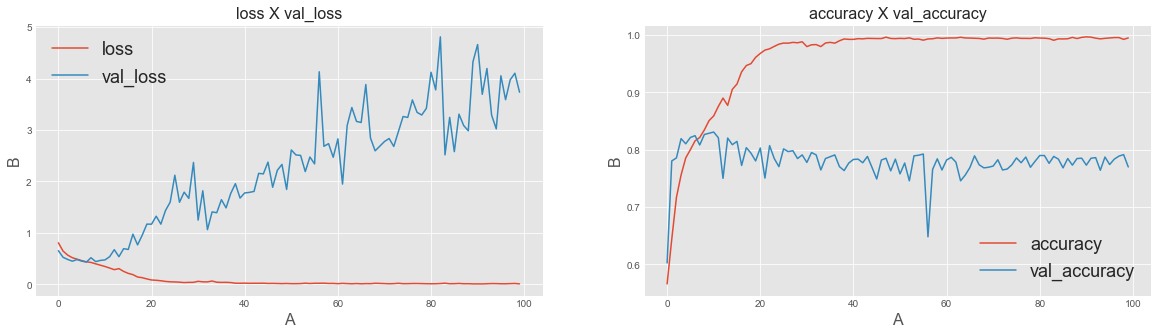

In [61]:
training(model, 'model_rnn')

In [62]:
def BiGRU():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(GRU(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [63]:
model = BiGRU()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 72, 100)           2270100   
                                                                 
 bidirectional_2 (Bidirectio  (None, 72, 144)          75168     
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 144)              0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_2 (Batc  (None, 144)              576       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 144)               0         
                                                      

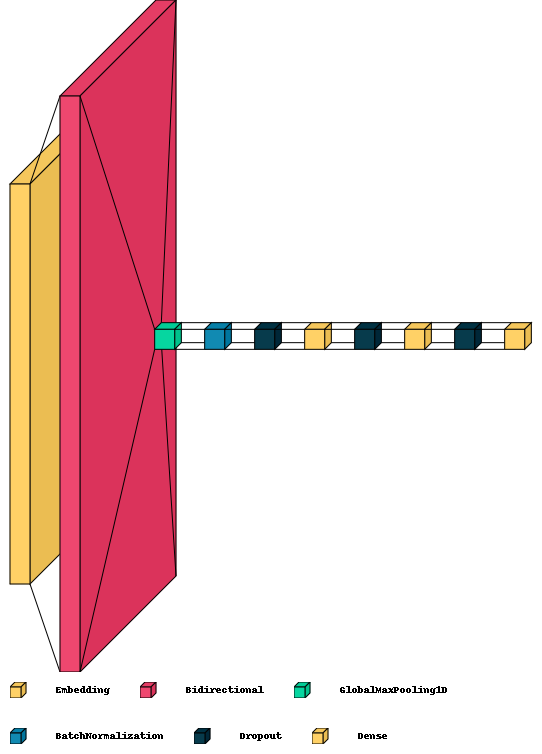

In [64]:
visualkeras.layered_view(model,legend=True, draw_volume=True, spacing=30)

Epoch 1/100
179/179 [==============================] - 54s 246ms/step - loss: 0.7297 - accuracy: 0.6402 - val_loss: 0.6081 - val_accuracy: 0.6780
Epoch 2/100
179/179 [==============================] - 40s 222ms/step - loss: 0.5426 - accuracy: 0.7429 - val_loss: 0.4639 - val_accuracy: 0.8193
Epoch 3/100
179/179 [==============================] - 48s 265ms/step - loss: 0.4772 - accuracy: 0.7875 - val_loss: 0.4186 - val_accuracy: 0.8367
Epoch 4/100
179/179 [==============================] - 43s 239ms/step - loss: 0.4219 - accuracy: 0.8168 - val_loss: 0.4120 - val_accuracy: 0.8304
Epoch 5/100
179/179 [==============================] - 46s 256ms/step - loss: 0.3788 - accuracy: 0.8460 - val_loss: 0.4185 - val_accuracy: 0.8235
Epoch 6/100
179/179 [==============================] - 44s 244ms/step - loss: 0.3195 - accuracy: 0.8742 - val_loss: 0.4392 - val_accuracy: 0.8051
Epoch 7/100
179/179 [==============================] - 39s 216ms/step - loss: 0.2479 - accuracy: 0.9087 - val_loss: 0.4936 -

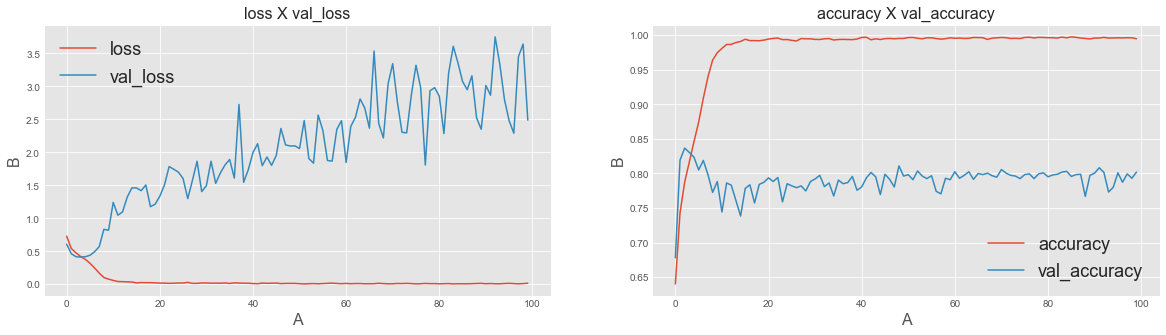

In [65]:
training(model, 'model_bigru')

In [66]:
def BiLSTM():
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        input_length=length_long_sentence))
    model.add(Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.2)))
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [67]:
model = BiLSTM()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 72, 100)           2270100   
                                                                 
 bidirectional_3 (Bidirectio  (None, 72, 144)          99648     
 nal)                                                            
                                                                 
 global_max_pooling1d_3 (Glo  (None, 144)              0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_3 (Batc  (None, 144)              576       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 144)               0         
                                                      

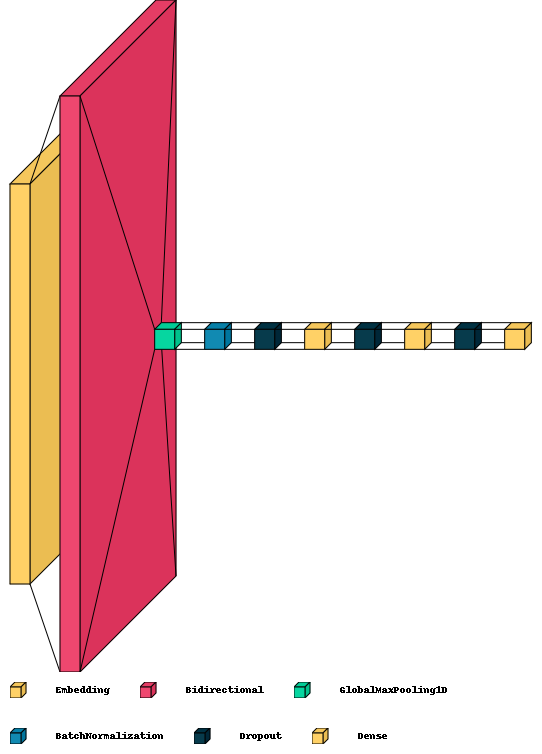

In [68]:
visualkeras.layered_view(model,legend=True, draw_volume=True, spacing=30)

In [69]:
# training(model, 'model_bilstm')

In [70]:
submission.target = (model.predict(test_sentences) > 0.5).astype("int32")
submission.to_csv("dataset/submission.csv", index=False)

102/102 [==============================] - 5s 37ms/step


In [71]:
test_preds = (model.predict(test_sentences) > 0.5).astype("int32")
print('sklearn f1_score average=micro:', f1_score(gt_df['target'], test_preds, average='micro'))
print('classification_report accuracy:', classification_report(gt_df['target'], test_preds, output_dict=True)['accuracy'])
print(classification_report(gt_df['target'], test_preds))

102/102 [==============================] - 3s 33ms/step
sklearn f1_score average=micro: 0.569414649095924
classification_report accuracy: 0.569414649095924
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1861
           1       0.20      0.00      0.00      1402

    accuracy                           0.57      3263
   macro avg       0.38      0.50      0.36      3263
weighted avg       0.41      0.57      0.41      3263



In [72]:

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# import pydot
import graphviz
# from tensorflow.keras.utils import plot_model
import pydot_ng as pydot

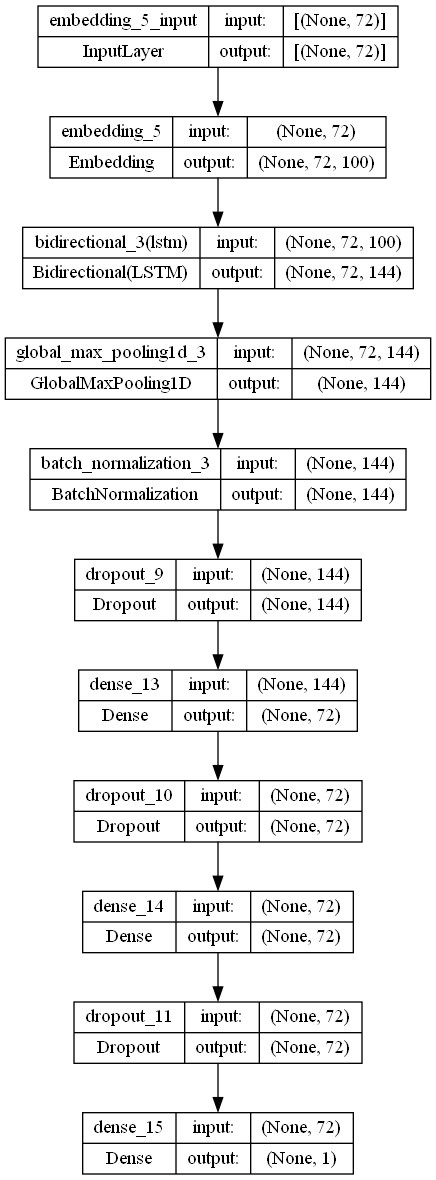

In [73]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)